# AMLB shorter runs visualizations

In [26]:
import itertools
import math
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn

In [27]:
from data_processing import get_print_friendly_name, impute_missing_results, calculate_ranks, add_rescale, is_old
from visualization_early import FRAMEWORK_TO_COLOR

In [28]:
PROJECT_ROOT = Path(".").absolute().parent
DATA_DIRECTORY = PROJECT_ROOT / "data"
FIGURE_DIRECTORY = PROJECT_ROOT / "figures"

for subfolder in ["pareto_performance_inference", "pareto_performance_training", "pareto_training_inference"]:
    (FIGURE_DIRECTORY / subfolder).mkdir(parents=True, exist_ok=True)

In [29]:
results_not_early = pd.read_csv(DATA_DIRECTORY / "amlb_all.csv", dtype={"info": str})

In [30]:
results_early = pd.read_csv(DATA_DIRECTORY / "amlb_all_early.csv", dtype={"info": str})

In [31]:
import pandas as pd

results_combined = pd.concat([results_not_early, results_early])

# Define the list of frameworks to keep
frameworks_to_keep = ['AutoGluon_benchmark', 'AutoGluon_HQIL', 'AutoGluon_HQ', 'AutoGluon_FI_FT_IL', 'FEDOT', 'H2OAutoML', 'TPOT', 'flaml', 'RandomForest_60min', 'TunedRandomForest_60min', 'constantpredictor_60min']

# Filter the dataframe
results = results_combined[results_combined['framework'].str.contains('|'.join(frameworks_to_keep))]
results["framework"] = results["framework"].apply(get_print_friendly_name)
# Print the filtered dataframe
print(results.framework.unique())

['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min'
 'AutoGluon(HQ)_5min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_10min'
 'AutoGluon(B)_30min' 'AutoGluon(B)_5min' 'AutoGluon(B)_60min'
 'FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'H2OAutoML_10min'
 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min' 'RF_60min'
 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min' 'CP_60min'
 'flaml_10min' 'flaml_30min' 'flaml_5min' 'flaml_60min'
 'AutoGluon(FIFTIL)_E_10min' 'AutoGluon(FIFTIL)_E_30min'
 'AutoGluon(FIFTIL)_E_5min' 'AutoGluon(FIFTIL)_E_60min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQIL)_E_30min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQIL)_E_60min'
 'AutoGluon(HQ)_E_10min' 'AutoGluon(HQ)_E_30min' 'AutoGluon(HQ)_E_5min'
 'AutoGluon(HQ)_E_60min' 'AutoGluon(B)_E_10min' 'AutoGluon(B)_E_30min'
 'AutoGluon(B)_E_5min' 'AutoGluon(B)_E_60min' 'FEDOT_E_10min'
 'FEDOT_E_30min' 'FEDOT_E_5min' 'FEDOT

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2680780691.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["framework"] = results["framework"].apply(get_print_friendly_name)


# Inference vs Performance

mean rescaled result vs median inference speed row/s at 10k and at 1

In [32]:
import matplotlib.text as mtext
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import MinMaxScaler
    
def calculate_pareto(xs, ys) -> list[tuple[float, float]]:
    pairs = list(zip(xs, ys))
    return [
        (x, y)
        for x, y in pairs
        if not any((x2>=x and y2 >=y) and (x!=x2 or y!=y2) for x2, y2 in pairs)
    ]

def plot_pareto(data, x, y, ax, color="#cccccc"):
    pareto = sorted(calculate_pareto(data[x], data[y]))
    for opt, next_opt in zip(pareto, pareto[1:]):
        ax.plot([opt[0], opt[0], next_opt[0]], [opt[1],next_opt[1], next_opt[1]], color=color, zorder=0)
        

In [33]:
# Define a function to replace the prefix
def replace_prefix(framework, prefix):
    if framework.startswith(prefix):
        return framework[len(prefix):]
    return framework

In [34]:
strings_in_frameworks_pareto = ['flaml', 'H2OAutoML', 'TPOT', 'FEDOT', 'AutoGluon(HQ)', 'AutoGluon(HQIL)', 'AutoGluon(B)', 'AutoGluon(FIFTIL)', ]

In [35]:
name_mapping = {
    'constantpredictor_60min': 'CP_60min',
    'RandomForest_60min': 'RF_60min',
    'TunedRandomForest_60min': 'TRF_60min'
}

In [36]:
list_order = list(FRAMEWORK_TO_COLOR.keys())

In [37]:
results.framework.unique()

array(['AutoGluon(HQIL)_10min', 'AutoGluon(HQIL)_30min',
       'AutoGluon(HQIL)_5min', 'AutoGluon(HQIL)_60min',
       'AutoGluon(HQ)_10min', 'AutoGluon(HQ)_30min', 'AutoGluon(HQ)_5min',
       'AutoGluon(HQ)_60min', 'AutoGluon(B)_10min', 'AutoGluon(B)_30min',
       'AutoGluon(B)_5min', 'AutoGluon(B)_60min', 'FEDOT_10min',
       'FEDOT_30min', 'FEDOT_5min', 'FEDOT_60min', 'H2OAutoML_10min',
       'H2OAutoML_30min', 'H2OAutoML_5min', 'H2OAutoML_60min', 'RF_60min',
       'TPOT_10min', 'TPOT_30min', 'TPOT_5min', 'TPOT_60min', 'TRF_60min',
       'CP_60min', 'flaml_10min', 'flaml_30min', 'flaml_5min',
       'flaml_60min', 'AutoGluon(FIFTIL)_E_10min',
       'AutoGluon(FIFTIL)_E_30min', 'AutoGluon(FIFTIL)_E_5min',
       'AutoGluon(FIFTIL)_E_60min', 'AutoGluon(HQIL)_E_10min',
       'AutoGluon(HQIL)_E_30min', 'AutoGluon(HQIL)_E_5min',
       'AutoGluon(HQIL)_E_60min', 'AutoGluon(HQ)_E_10min',
       'AutoGluon(HQ)_E_30min', 'AutoGluon(HQ)_E_5min',
       'AutoGluon(HQ)_E_60min', 'Auto

### Early and not early together by constraints

flaml
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'flaml_10min' 'flaml_30min'
 'flaml_5min' 'flaml_60min' 'flaml_E_10min' 'flaml_E_30min' 'flaml_E_5min'
 'flaml_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


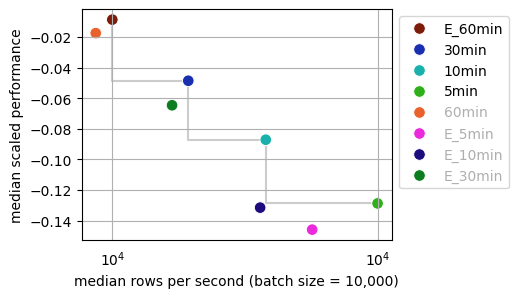

H2OAutoML
this frameworks ['H2OAutoML_10min' 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min'
 'RF_60min' 'TRF_60min' 'CP_60min' 'H2OAutoML_E_10min' 'H2OAutoML_E_30min'
 'H2OAutoML_E_5min' 'H2OAutoML_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


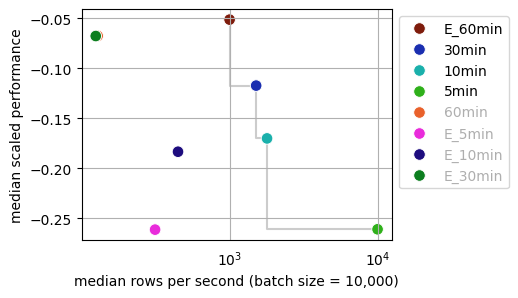

TPOT
this frameworks ['RF_60min' 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min'
 'CP_60min' 'TPOT_E_10min' 'TPOT_E_30min' 'TPOT_E_5min' 'TPOT_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


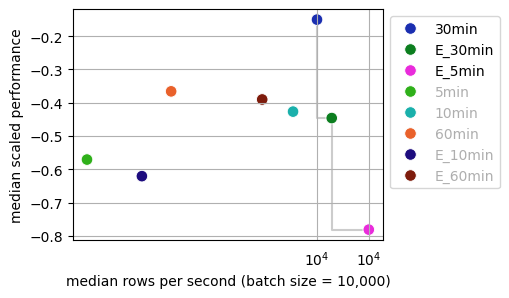

FEDOT
this frameworks ['FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'RF_60min'
 'TRF_60min' 'CP_60min' 'FEDOT_E_10min' 'FEDOT_E_30min' 'FEDOT_E_5min'
 'FEDOT_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


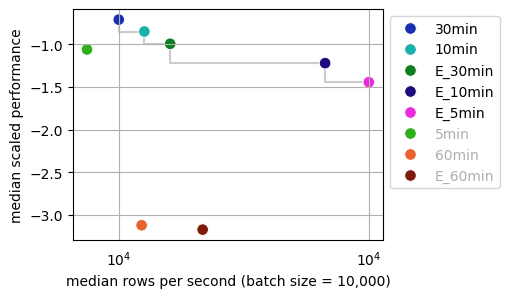

AutoGluon(HQ)
this frameworks ['AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min' 'AutoGluon(HQ)_5min'
 'AutoGluon(HQ)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(HQ)_E_10min' 'AutoGluon(HQ)_E_30min' 'AutoGluon(HQ)_E_5min'
 'AutoGluon(HQ)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


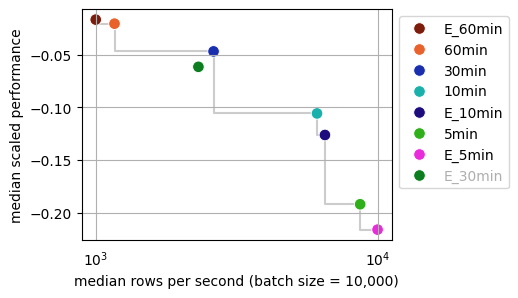

AutoGluon(HQIL)
this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQIL)_E_30min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


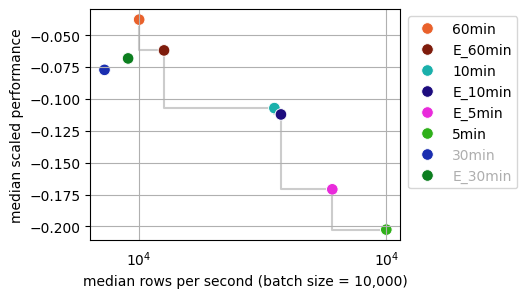

AutoGluon(B)
this frameworks ['AutoGluon(B)_10min' 'AutoGluon(B)_30min' 'AutoGluon(B)_5min'
 'AutoGluon(B)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(B)_E_10min' 'AutoGluon(B)_E_30min' 'AutoGluon(B)_E_5min'
 'AutoGluon(B)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


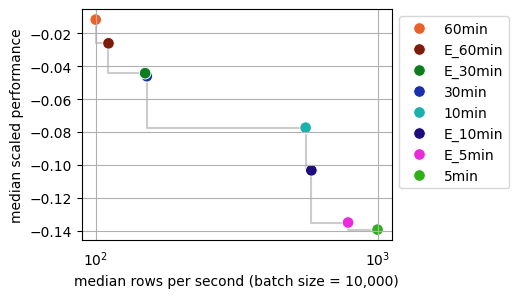

AutoGluon(FIFTIL)
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'AutoGluon(FIFTIL)_E_10min'
 'AutoGluon(FIFTIL)_E_30min' 'AutoGluon(FIFTIL)_E_5min'
 'AutoGluon(FIFTIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3479031380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


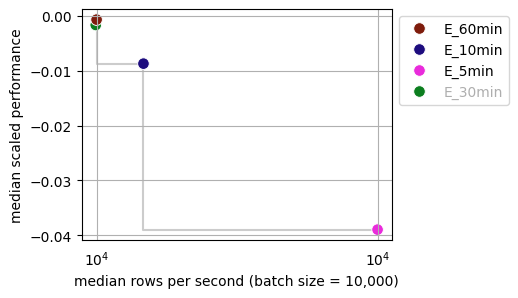

In [39]:
for name_fr in strings_in_frameworks_pareto:
    print(name_fr)
    this_framework = results[results['framework'].isin([f'{name_fr}_5min', f'{name_fr}_10min', f'{name_fr}_30min', f'{name_fr}_60min', f'{name_fr}_E_5min', f'{name_fr}_E_10min', f'{name_fr}_E_30min', f'{name_fr}_E_60min', 'RF_60min', 'TRF_60min', 'CP_60min'])]
    # Map the name of the baselines
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000", "metric"]].groupby(["framework", "task", "constraint" , "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    
    data["scaled"] = -data["scaled"]
    data['framework'] = data['framework'].apply(lambda x: replace_prefix(x, f"{name_fr}_"))

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
                
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )
    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here

    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    
    # Set the selected x-ticks and labels
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.4, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference_{name_fr}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference_{name_fr}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)

### Extra plot only AutoGluon

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(FIFTIL)_E_10min' 'AutoGluon(FIFTIL)_E_30min'
 'AutoGluon(FIFTIL)_E_5min' 'AutoGluon(FIFTIL)_E_60min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQIL)_E_30min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3750599319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


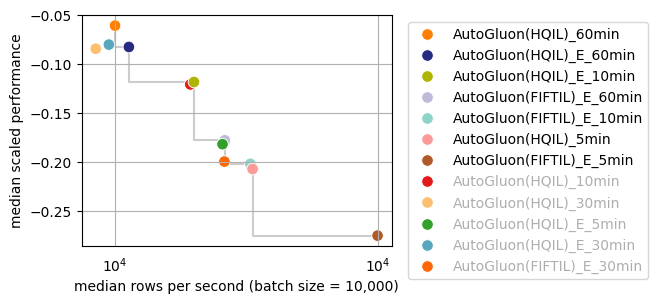

In [41]:
import re

filtered_list = ['AutoGluon(HQIL)', 'AutoGluon(FIFTIL)', 'RF_60min', 'TRF_60min', 'CP_60min']
pattern = '|'.join(map(re.escape, filtered_list))
this_framework = results[results['framework'].str.contains(pattern, regex=True)]

print("this frameworks", this_framework.framework.unique())
this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
exclude = ["CP_60min", "RF_60min", "TRF_60min"]
data = this_framework
data = impute_missing_results(data, with_results_from="CP_60min")

data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000", "metric"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
data = add_rescale(data, lower="RF_60min")    
data = data[~data["framework"].isin(exclude)]
data["scaled"] = -data["scaled"]
current_frameworks = data.framework.unique()
common_elements = [element for element in list_order if element in current_frameworks]
data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

frameworks_to_keep_legend = []
pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
pareto_efficient_list = [x for x, y in pareto_efficient]
pareto_not_efficient_list = []
for framework in FRAMEWORK_TO_COLOR.keys():
    if framework in data.index.get_level_values('framework').unique():
        is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
        if is_efficient:
            frameworks_to_keep_legend.append(framework)
        else:
            pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

# Create a dictionary to map frameworks to their corresponding row_per_s values
framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}

# Sort frameworks_to_keep_legend based on the row_per_s values
frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
            

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = seaborn.scatterplot(
    data, 
    x="row_per_s", 
    y="scaled", 
    hue="framework",
    palette=color_map,
    s=70,  # marker size
    hue_order=common_elements,
    # hue_order = frameworks_to_keep_legend,
    ax=ax,
)
plot_pareto(data, x="row_per_s", y="scaled", ax=ax)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.set_xscale('log')
ax.set_xlabel('median rows per second (batch size = 10,000)')
ax.set_ylabel('median scaled performance')
ax.grid(True)  # Add grid here

pareto_efficient_list = sorted([x for x, y in pareto_efficient])
first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
selected_ticks = first_last_pareto
selected_labels = first_last_pareto
selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]

# Set the selected x-ticks and labels
ax.set_xticks(selected_ticks)
ax.set_xticklabels(selected_labels)

# Ensure the tick parameters are set correctly
ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
###
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.85, 1))

# Change the color of the first three labels to red
for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
    text.set_color('#aeaeae')
###
        
with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference_HQIL_vs_FI_FT.pdf") as f:
    f.savefig(fig, bbox_inches="tight")

# Define the file path for the PNG file
file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / "performance_inference_HQIL_vs_FI_FT.png"
# Save the figure as a PNG file
fig.savefig(file_path, bbox_inches="tight", dpi=1000)
plt.show()
plt.close(fig)

#### same but gray for inneficient

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(FIFTIL)_E_10min' 'AutoGluon(FIFTIL)_E_30min'
 'AutoGluon(FIFTIL)_E_5min' 'AutoGluon(FIFTIL)_E_60min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQIL)_E_30min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\786288116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


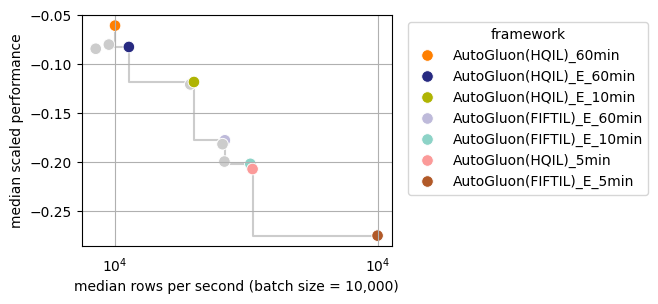

In [42]:
import re

filtered_list = ['AutoGluon(HQIL)', 'AutoGluon(FIFTIL)', 'RF_60min', 'TRF_60min', 'CP_60min']
pattern = '|'.join(map(re.escape, filtered_list))
this_framework = results[results['framework'].str.contains(pattern, regex=True)]
print("this frameworks", this_framework.framework.unique())
this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))

exclude = ["CP_60min", "RF_60min", "TRF_60min"]
data = this_framework
data = impute_missing_results(data, with_results_from="CP_60min")

data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000", "metric"]].groupby(["framework", "task", "constraint",  "metric"], as_index=False).mean()
data = add_rescale(data, lower="RF_60min")    
data = data[~data["framework"].isin(exclude)]


data["scaled"] = -data["scaled"]

current_frameworks = data.framework.unique()
common_elements = [element for element in list_order if element in current_frameworks]

data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

# Calculate Pareto efficient methods
pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
pareto_efficient_list = [x for x, y in pareto_efficient]
frameworks_to_keep_legend = []
# # Update color map
color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
for framework in FRAMEWORK_TO_COLOR.keys():
    if framework in data.index.get_level_values('framework').unique():
        is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
        if is_efficient:
            frameworks_to_keep_legend.append(framework)
        else:
            color_map[framework] = "#cccccc"  # Grey color for inefficient methods

# Create a dictionary to map frameworks to their corresponding row_per_s values
framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}

# Sort frameworks_to_keep_legend based on the row_per_s values
frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax = seaborn.scatterplot(
    data, 
    x="row_per_s", 
    y="scaled", 
    hue="framework",
    palette=color_map,
    s=70,  # marker size
    # hue_order=common_elements,
    hue_order = frameworks_to_keep_legend,
    ax=ax,
)
plot_pareto(data, x="row_per_s", y="scaled", ax=ax)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.set_xscale('log')
ax.set_xlabel('median rows per second (batch size = 10,000)')
ax.set_ylabel('median scaled performance')
ax.grid(True)  # Add grid here

pareto_efficient_list = sorted([x for x, y in pareto_efficient])
first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
selected_ticks = first_last_pareto
selected_labels = first_last_pareto
selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]

ax.set_xticks(selected_ticks)
ax.set_xticklabels(selected_labels)

# Ensure the tick parameters are set correctly
ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.85, 1))
with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference_HQIL_vs_FI_FT_gray.pdf") as f:
    f.savefig(fig, bbox_inches="tight")

# Define the file path for the PNG file
file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / "performance_inference_HQIL_vs_FI_FT_gray.png"
# Save the figure as a PNG file
fig.savefig(file_path, bbox_inches="tight", dpi=1000)
plt.show()
plt.close(fig)

## Training time and performance (early_stopping)

flaml
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'flaml_10min' 'flaml_30min'
 'flaml_5min' 'flaml_60min' 'flaml_E_10min' 'flaml_E_30min' 'flaml_E_5min'
 'flaml_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


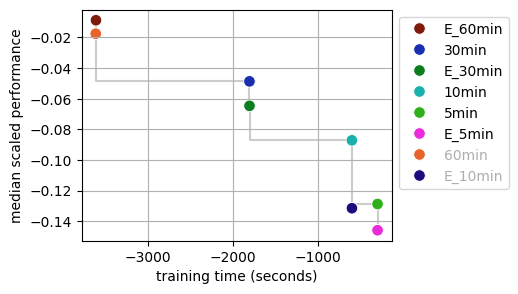

H2OAutoML
this frameworks ['H2OAutoML_10min' 'H2OAutoML_30min' 'H2OAutoML_5min' 'H2OAutoML_60min'
 'RF_60min' 'TRF_60min' 'CP_60min' 'H2OAutoML_E_10min' 'H2OAutoML_E_30min'
 'H2OAutoML_E_5min' 'H2OAutoML_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


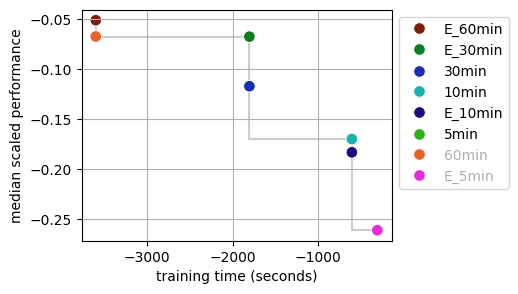

TPOT
this frameworks ['RF_60min' 'TPOT_10min' 'TPOT_30min' 'TPOT_5min' 'TPOT_60min' 'TRF_60min'
 'CP_60min' 'TPOT_E_10min' 'TPOT_E_30min' 'TPOT_E_5min' 'TPOT_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


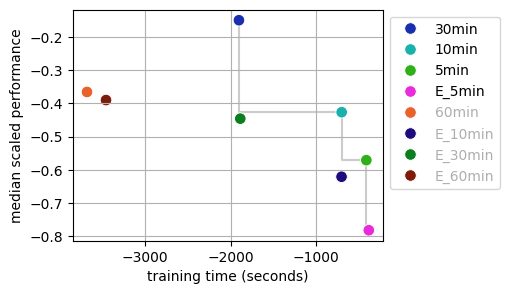

FEDOT
this frameworks ['FEDOT_10min' 'FEDOT_30min' 'FEDOT_5min' 'FEDOT_60min' 'RF_60min'
 'TRF_60min' 'CP_60min' 'FEDOT_E_10min' 'FEDOT_E_30min' 'FEDOT_E_5min'
 'FEDOT_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


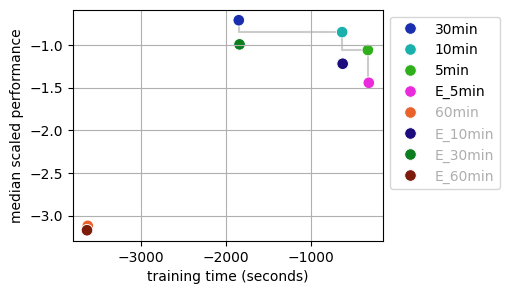

AutoGluon(HQ)
this frameworks ['AutoGluon(HQ)_10min' 'AutoGluon(HQ)_30min' 'AutoGluon(HQ)_5min'
 'AutoGluon(HQ)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(HQ)_E_10min' 'AutoGluon(HQ)_E_30min' 'AutoGluon(HQ)_E_5min'
 'AutoGluon(HQ)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


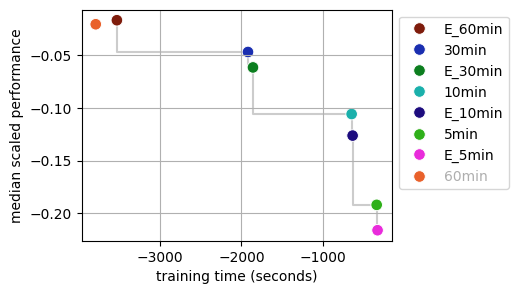

AutoGluon(HQIL)
this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQIL)_30min' 'AutoGluon(HQIL)_5min'
 'AutoGluon(HQIL)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQIL)_E_30min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


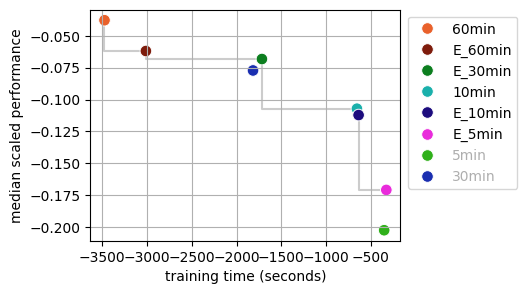

AutoGluon(B)
this frameworks ['AutoGluon(B)_10min' 'AutoGluon(B)_30min' 'AutoGluon(B)_5min'
 'AutoGluon(B)_60min' 'RF_60min' 'TRF_60min' 'CP_60min'
 'AutoGluon(B)_E_10min' 'AutoGluon(B)_E_30min' 'AutoGluon(B)_E_5min'
 'AutoGluon(B)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


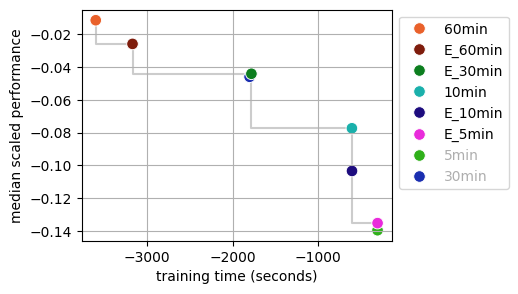

AutoGluon(FIFTIL)
this frameworks ['RF_60min' 'TRF_60min' 'CP_60min' 'AutoGluon(FIFTIL)_E_10min'
 'AutoGluon(FIFTIL)_E_30min' 'AutoGluon(FIFTIL)_E_5min'
 'AutoGluon(FIFTIL)_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2524645817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


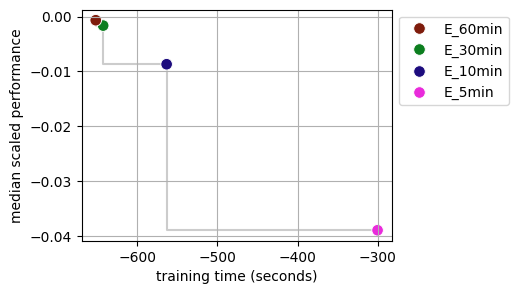

In [43]:
for name_fr in strings_in_frameworks_pareto:
    print(name_fr)
    this_framework = results[results['framework'].isin([f'{name_fr}_5min', f'{name_fr}_10min', f'{name_fr}_30min', f'{name_fr}_60min', f'{name_fr}_E_5min', f'{name_fr}_E_10min', f'{name_fr}_E_30min', f'{name_fr}_E_60min', 'RF_60min', 'TRF_60min', 'CP_60min'])]
    # Map the name of the baselines
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))

    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "training_duration",  "metric"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data["scaled"] = -data["scaled"]
    data["training_duration"] = -data["training_duration"]
    data['framework'] = data['framework'].apply(lambda x: replace_prefix(x, f"{name_fr}_"))
    # data['framework'] = data['framework'].str.replace(f"{name_fr}_", '')
    # print(data['framework'].unique())
    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]

    data = data.groupby(["framework", "constraint"])[["training_duration", "scaled"]].median()

    # data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["training_duration"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "training_duration"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "training_duration"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ###
                
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        y="scaled", 
        x="training_duration",  
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )
    plot_pareto(data, x="training_duration", y="scaled", ax=ax)

    ax.set_xlabel('training time (seconds)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here

    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.4, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    ###

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_inference_{name_fr}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_inference_{name_fr}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    
    plt.show()
    plt.close(fig)

## Training time and inference (early_stopping)

flaml


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

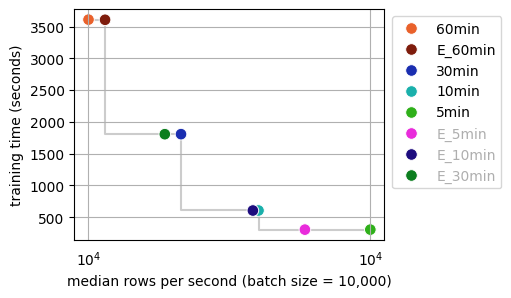

H2OAutoML


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

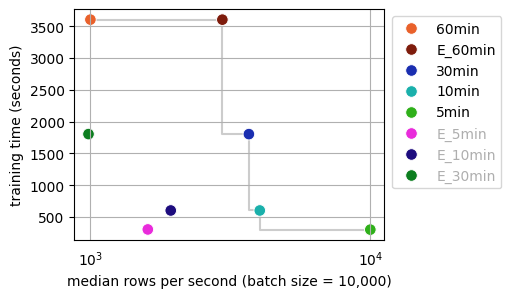

TPOT


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

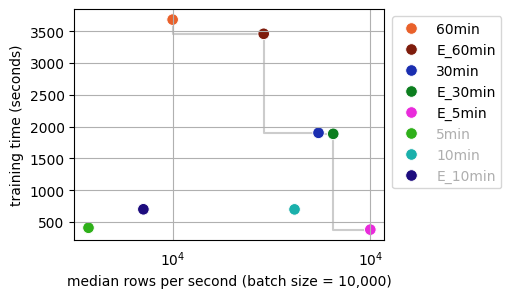

FEDOT


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

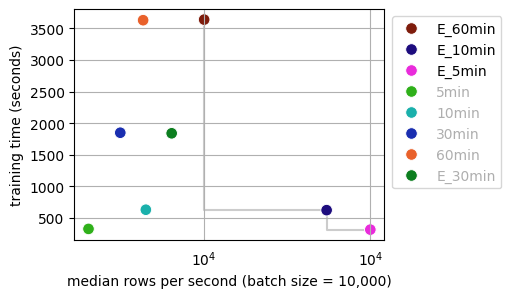

AutoGluon(HQ)


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

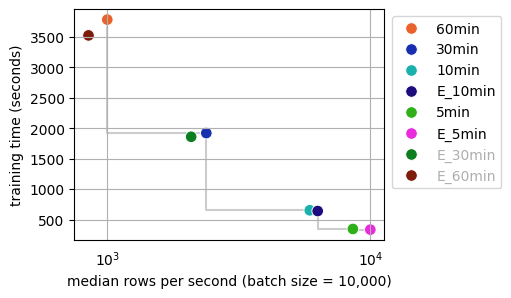

AutoGluon(HQIL)


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

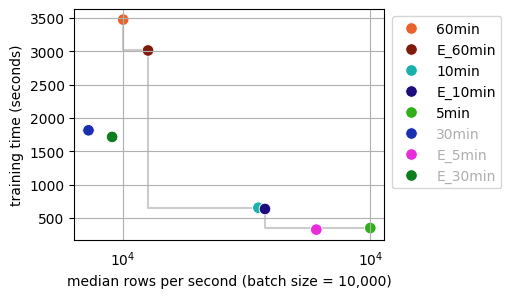

AutoGluon(B)


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

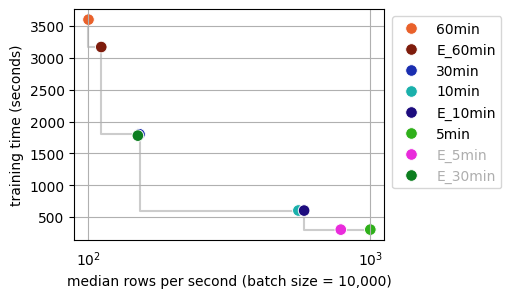

AutoGluon(FIFTIL)


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["training_duration"] = data["training_duration"]
C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\664234208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

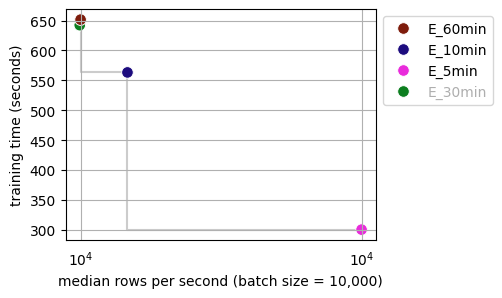

In [17]:
# pyplot.locator_params(nbins=4)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator

for name_fr in strings_in_frameworks_pareto:
    print(name_fr)
    this_framework = results[results['framework'].isin([f'{name_fr}_5min', f'{name_fr}_10min', f'{name_fr}_30min', f'{name_fr}_60min', f'{name_fr}_E_5min', f'{name_fr}_E_10min', f'{name_fr}_E_30min', f'{name_fr}_E_60min', 'RF_60min', 'TRF_60min', 'CP_60min'])]
    # Map the name of the baselines
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]

    data = this_framework
    data["training_duration"] = data["training_duration"]
    data['framework'] = data['framework'].apply(lambda x: replace_prefix(x, f"{name_fr}_"))

    data = impute_missing_results(data, with_results_from="CP_60min")
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000", "training_duration"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]

    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    # data = data.groupby(["framework", "constraint", "metric"])[["infer_batch_size_file_10000", "training_duration"]].median()
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "training_duration"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ###
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="training_duration", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )
    # pareto_performance_inference(data, x="row_per_s", y="training_duration", ax=ax)
    plot_pareto(data, x="row_per_s", y="training_duration", ax=ax)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('training time (seconds)')
    ax.grid(True)  # Add grid here

    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]

    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    ###
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.4, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
        
    with PdfPages(FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_{name_fr}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    file_path = FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_{name_fr}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    plt.show()
    plt.close(fig)


### All frameworks by time 

#### pareto_performance_inference


In [44]:
strings_by_time = ['_5min', '_10min', '_30min', '_60min']
extra_frameworks = ['RF_60min', 'TRF_60min', 'CP_60min']

this frameworks ['AutoGluon(HQIL)_5min' 'AutoGluon(HQ)_5min' 'AutoGluon(B)_5min'
 'FEDOT_5min' 'H2OAutoML_5min' 'RF_60min' 'TPOT_5min' 'TRF_60min'
 'CP_60min' 'flaml_5min' 'AutoGluon(FIFTIL)_E_5min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQ)_E_5min' 'AutoGluon(B)_E_5min'
 'FEDOT_E_5min' 'H2OAutoML_E_5min' 'TPOT_E_5min' 'flaml_E_5min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\1706894293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


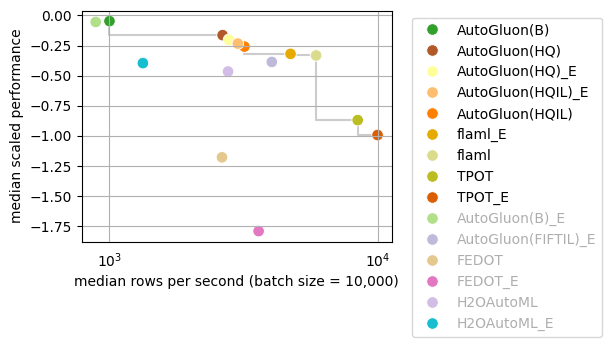

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQ)_10min' 'AutoGluon(B)_10min'
 'FEDOT_10min' 'H2OAutoML_10min' 'RF_60min' 'TPOT_10min' 'TRF_60min'
 'CP_60min' 'flaml_10min' 'AutoGluon(FIFTIL)_E_10min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQ)_E_10min' 'AutoGluon(B)_E_10min'
 'FEDOT_E_10min' 'H2OAutoML_E_10min' 'TPOT_E_10min' 'flaml_E_10min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\1706894293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


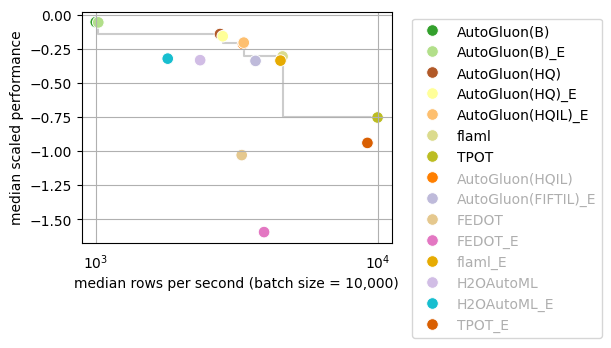

this frameworks ['AutoGluon(HQIL)_30min' 'AutoGluon(HQ)_30min' 'AutoGluon(B)_30min'
 'FEDOT_30min' 'H2OAutoML_30min' 'RF_60min' 'TPOT_30min' 'TRF_60min'
 'CP_60min' 'flaml_30min' 'AutoGluon(FIFTIL)_E_30min'
 'AutoGluon(HQIL)_E_30min' 'AutoGluon(HQ)_E_30min' 'AutoGluon(B)_E_30min'
 'FEDOT_E_30min' 'H2OAutoML_E_30min' 'TPOT_E_30min' 'flaml_E_30min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\1706894293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


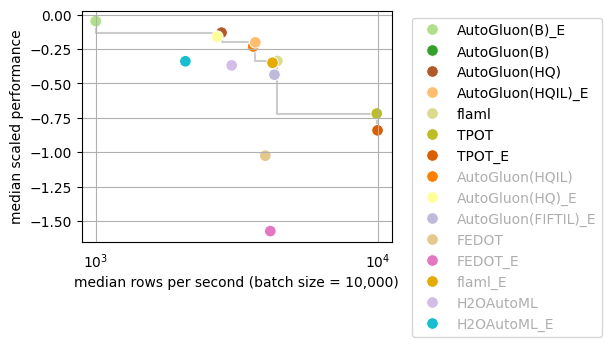

this frameworks ['AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_60min'
 'FEDOT_60min' 'H2OAutoML_60min' 'RF_60min' 'TPOT_60min' 'TRF_60min'
 'CP_60min' 'flaml_60min' 'AutoGluon(FIFTIL)_E_60min'
 'AutoGluon(HQIL)_E_60min' 'AutoGluon(HQ)_E_60min' 'AutoGluon(B)_E_60min'
 'FEDOT_E_60min' 'H2OAutoML_E_60min' 'TPOT_E_60min' 'flaml_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\1706894293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


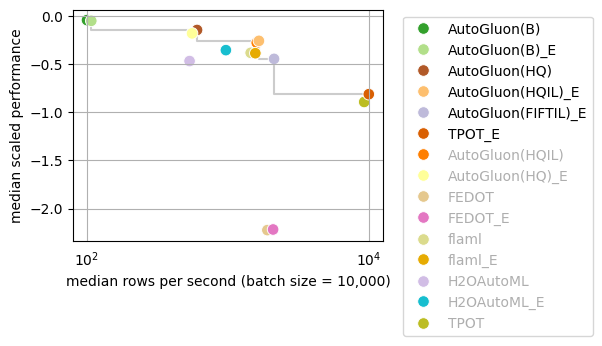

In [45]:
for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000",  "metric"]].groupby(["framework", "task", "constraint",  "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    data["scaled"] = -data["scaled"]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ###
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )

    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here
    
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    # text_labels = [mtext.Text(x=label, y=0, text=f'$\\mathdefault{{10^{{{int(label):.0e}}}}}$') for label in selected_labels]
    # print("selected_labels", text_labels)
    
    # Set the selected x-ticks and labels
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    ###
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.7, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    ###
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)

### (test image) ordering color

this frameworks ['AutoGluon(HQIL)_5min' 'AutoGluon(HQ)_5min' 'AutoGluon(B)_5min'
 'FEDOT_5min' 'H2OAutoML_5min' 'RF_60min' 'TPOT_5min' 'TRF_60min'
 'CP_60min' 'flaml_5min' 'AutoGluon(FIFTIL)_E_5min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQ)_E_5min' 'AutoGluon(B)_E_5min'
 'FEDOT_E_5min' 'H2OAutoML_E_5min' 'TPOT_E_5min' 'flaml_E_5min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\4277111952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


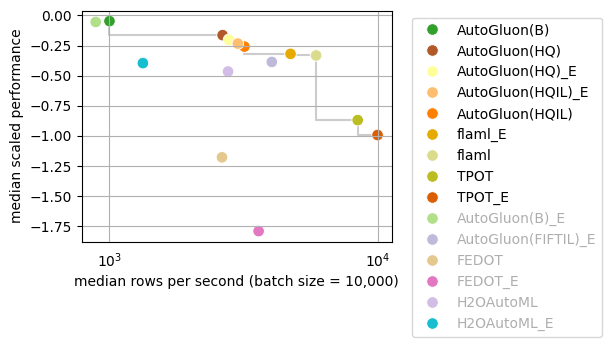

In [46]:
for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]

    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))

    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000",  "metric"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    data["scaled"] = -data["scaled"]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ### 
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )

    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    pareto_efficient_list = [x for x, y in pareto_efficient]
    
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here
    
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    ###
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.7, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    ###
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)
    break

### same but gray-scale not efficient

this frameworks ['AutoGluon(HQIL)_5min' 'AutoGluon(HQ)_5min' 'AutoGluon(B)_5min'
 'FEDOT_5min' 'H2OAutoML_5min' 'RF_60min' 'TPOT_5min' 'TRF_60min'
 'CP_60min' 'flaml_5min' 'AutoGluon(FIFTIL)_E_5min'
 'AutoGluon(HQIL)_E_5min' 'AutoGluon(HQ)_E_5min' 'AutoGluon(B)_E_5min'
 'FEDOT_E_5min' 'H2OAutoML_E_5min' 'TPOT_E_5min' 'flaml_E_5min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2500403352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


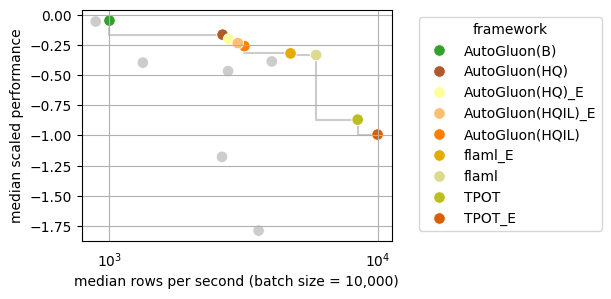

this frameworks ['AutoGluon(HQIL)_10min' 'AutoGluon(HQ)_10min' 'AutoGluon(B)_10min'
 'FEDOT_10min' 'H2OAutoML_10min' 'RF_60min' 'TPOT_10min' 'TRF_60min'
 'CP_60min' 'flaml_10min' 'AutoGluon(FIFTIL)_E_10min'
 'AutoGluon(HQIL)_E_10min' 'AutoGluon(HQ)_E_10min' 'AutoGluon(B)_E_10min'
 'FEDOT_E_10min' 'H2OAutoML_E_10min' 'TPOT_E_10min' 'flaml_E_10min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2500403352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


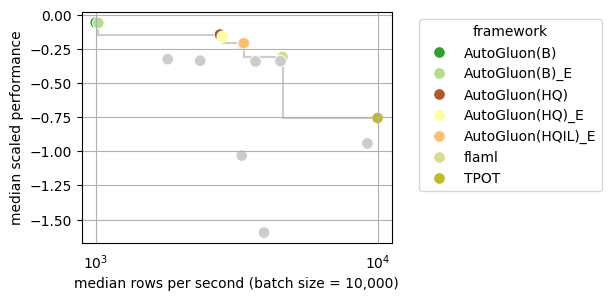

this frameworks ['AutoGluon(HQIL)_30min' 'AutoGluon(HQ)_30min' 'AutoGluon(B)_30min'
 'FEDOT_30min' 'H2OAutoML_30min' 'RF_60min' 'TPOT_30min' 'TRF_60min'
 'CP_60min' 'flaml_30min' 'AutoGluon(FIFTIL)_E_30min'
 'AutoGluon(HQIL)_E_30min' 'AutoGluon(HQ)_E_30min' 'AutoGluon(B)_E_30min'
 'FEDOT_E_30min' 'H2OAutoML_E_30min' 'TPOT_E_30min' 'flaml_E_30min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2500403352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


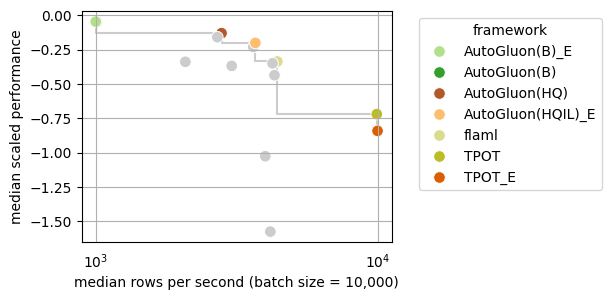

this frameworks ['AutoGluon(HQIL)_60min' 'AutoGluon(HQ)_60min' 'AutoGluon(B)_60min'
 'FEDOT_60min' 'H2OAutoML_60min' 'RF_60min' 'TPOT_60min' 'TRF_60min'
 'CP_60min' 'flaml_60min' 'AutoGluon(FIFTIL)_E_60min'
 'AutoGluon(HQIL)_E_60min' 'AutoGluon(HQ)_E_60min' 'AutoGluon(B)_E_60min'
 'FEDOT_E_60min' 'H2OAutoML_E_60min' 'TPOT_E_60min' 'flaml_E_60min']


C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2500403352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


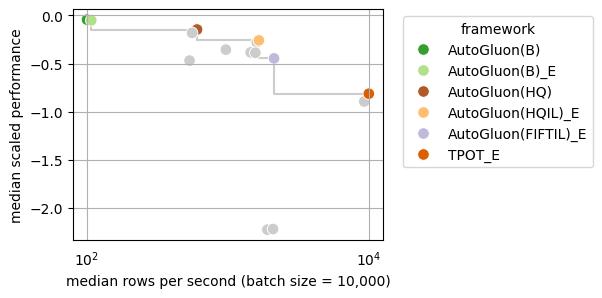

In [47]:
for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    print("this frameworks", this_framework.framework.unique())
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "infer_batch_size_file_10000",  "metric"]].groupby(["framework", "task", "constraint",  "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    data["scaled"] = -data["scaled"]
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "scaled"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                color_map[framework] = "#cccccc"  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="scaled", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        # hue_order=common_elements,
        hue_order=frameworks_to_keep_legend,
        ax=ax,
    )

    plot_pareto(data, x="row_per_s", y="scaled", ax=ax)
    
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here
    
    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]

    # Set the selected x-ticks and labels
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.7, 1))
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general_gray.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_inference" / f"performance_inference{name_time}_general_gray.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)

#### pareto_performance_training

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2479081278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


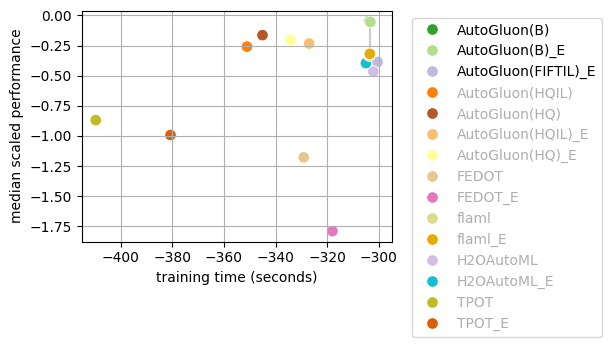

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2479081278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


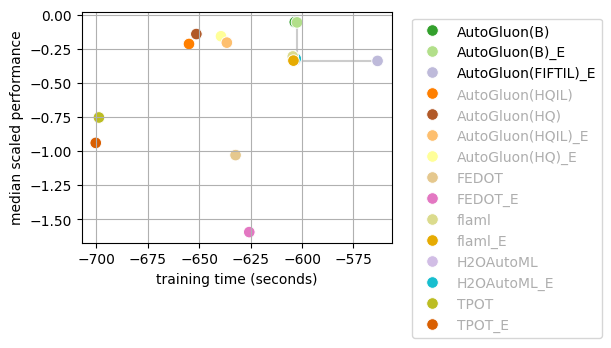

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2479081278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


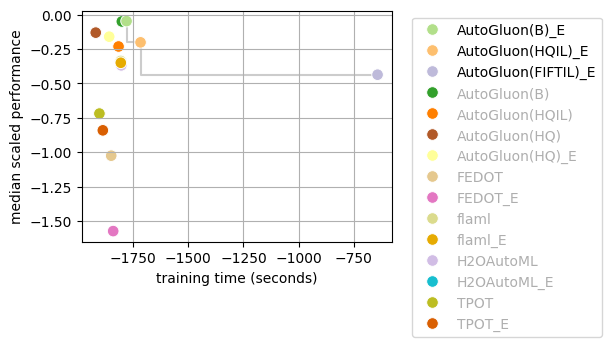

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\2479081278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


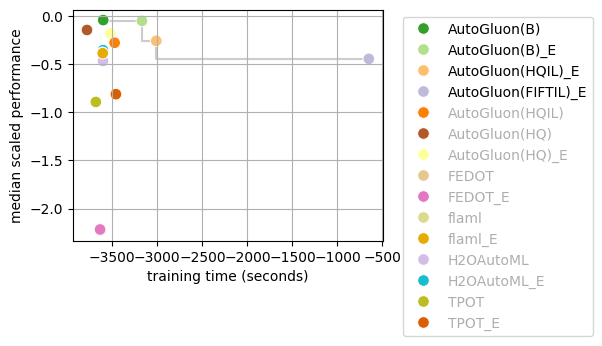

In [48]:
# pyplot.locator_params(nbins=4)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator

# legend_order = ['60min', '30min', '10min', '5min']

for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))    
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "training_duration",  "metric"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')
    data["scaled"] = -data["scaled"]
    data["training_duration"] = -data["training_duration"]

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    data = data.groupby(["framework", "constraint"])[["training_duration", "scaled"]].median()

    # data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["training_duration"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "training_duration"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "training_duration"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ###
                
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        y="scaled", 
        x="training_duration",  
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        # hue_order = frameworks_to_keep_legend,
        ax=ax,
    )
    plot_pareto(data, x="training_duration", y="scaled", ax=ax)

    ax.set_xlabel('training time (seconds)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here

    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.7, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    ###

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_training_general{name_time}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_training_general{name_time}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")
    
    plt.show()
    plt.close(fig)

### same but gray not efficient

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3751768697.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


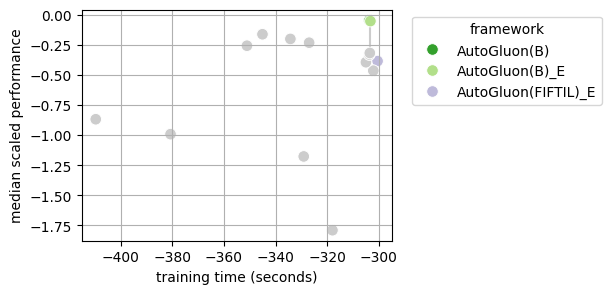

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3751768697.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


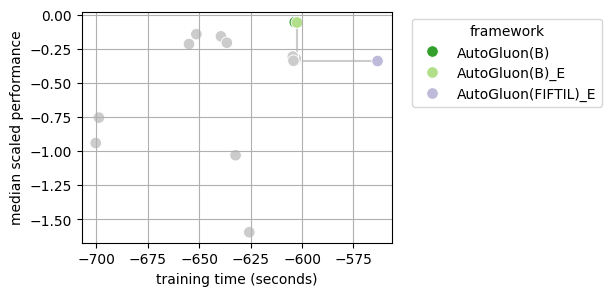

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3751768697.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


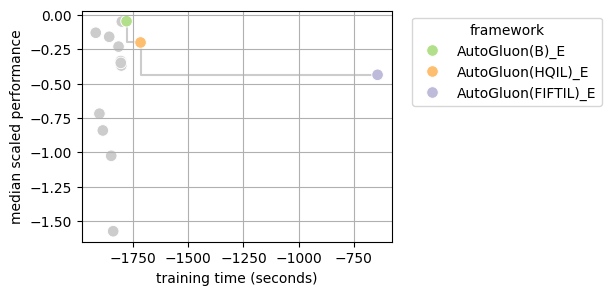

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3751768697.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


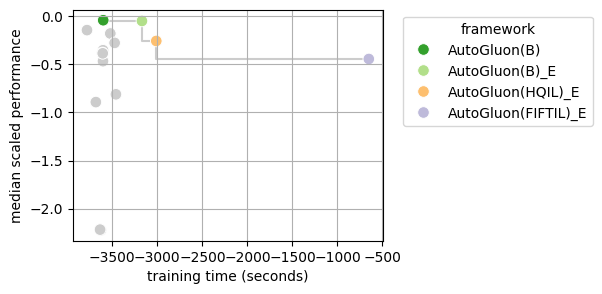

In [49]:
# pyplot.locator_params(nbins=4)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator

# legend_order = ['60min', '30min', '10min', '5min']

for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    
    data = data[["framework", "task", "constraint", "result", "training_duration",  "metric"]].groupby(["framework", "task", "constraint",  "metric"], as_index=False).mean()
    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')
    data["scaled"] = -data["scaled"]
    data["training_duration"] = -data["training_duration"]
    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    data = data.groupby(["framework", "constraint"])[["training_duration", "scaled"]].median()

    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    # Calculate Pareto efficient methods
    pareto_efficient = calculate_pareto(data["training_duration"], data["scaled"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    frameworks_to_keep_legend = []
    # # Update color map
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "training_duration"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                color_map[framework] = "#cccccc"  # Grey color for inefficient methods
                
    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "training_duration"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        y="scaled", 
        x="training_duration",  
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        # hue_order=common_elements,
        hue_order = frameworks_to_keep_legend,
        ax=ax,
    )
    plot_pareto(data, x="training_duration", y="scaled", ax=ax)
    
    # ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    # #ax.set_xscale('log')
    ax.set_xlabel('training time (seconds)')
    ax.set_ylabel('median scaled performance')
    ax.grid(True)  # Add grid here

    seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.7, 1))

    # Define the file path for the PNG file
    file_path = FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_training_general{name_time}_gray.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    with PdfPages(FIGURE_DIRECTORY / "pareto_performance_training" / f"performance_training_general{name_time}_gray.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    plt.show()
    plt.close(fig)

#### pareto_training_inference (without TPOT since it is biased)

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3622899381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


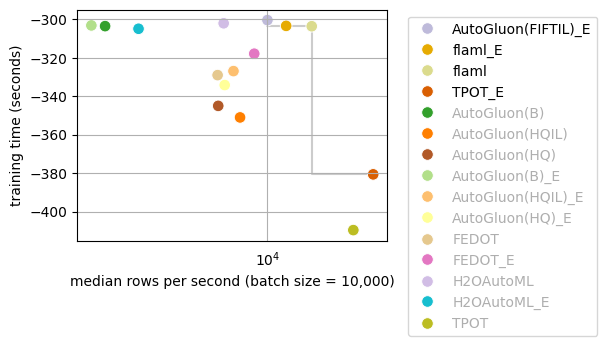

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3622899381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


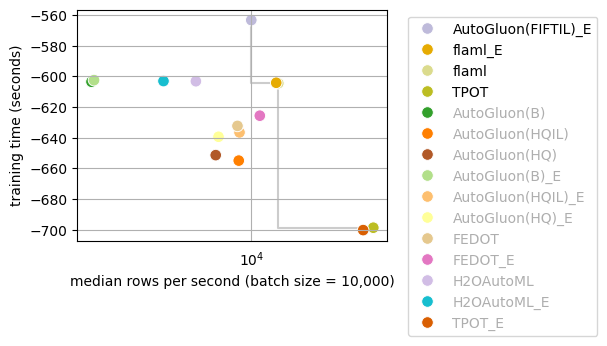

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3622899381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


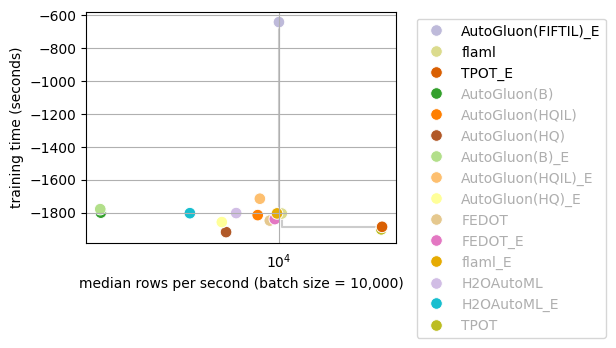

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3622899381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


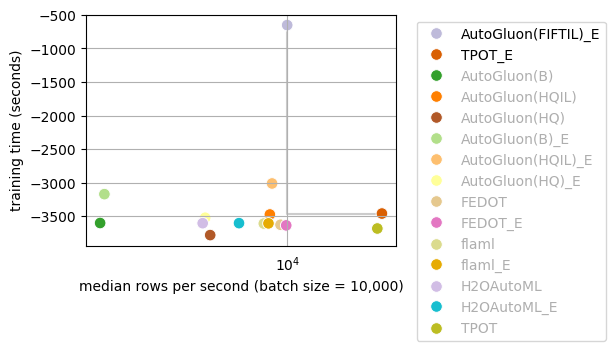

In [24]:
# pyplot.locator_params(nbins=4)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator

# legend_order = ['60min', '30min', '10min', '5min']

for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))

    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000", "training_duration"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]

    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data["training_duration"] = -data["training_duration"]
    data['framework'] = data['framework'].str.replace(name_time, '')

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    # data = data.groupby(["framework", "constraint", "metric"])[["infer_batch_size_file_10000", "training_duration"]].median()
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "training_duration"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    ###
    frameworks_to_keep_legend = []
    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_not_efficient_list = []
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                pareto_not_efficient_list.append(framework)  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    common_elements = frameworks_to_keep_legend + pareto_not_efficient_list# sorted
    ###

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="training_duration", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        hue_order=common_elements,
        ax=ax,
    )
    # pareto_performance_inference(data, x="row_per_s", y="training_duration", ax=ax)
    plot_pareto(data, x="row_per_s", y="training_duration", ax=ax)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('training time (seconds)')
    ax.grid(True)  # Add grid here

    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_efficient_list = sorted([x for x, y in pareto_efficient])
    # first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    first_last_pareto = [pareto_efficient_list[0]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    ###
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.7, 1))
    
    # Change the color of the first three labels to red
    for text in legend.get_texts()[len(frameworks_to_keep_legend):]:
        text.set_color('#aeaeae')
    
    with PdfPages(FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_general{name_time}.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    file_path = FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_general{name_time}.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)
    
    plt.show()
    plt.close(fig)

### same but in gray scale

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3276426233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


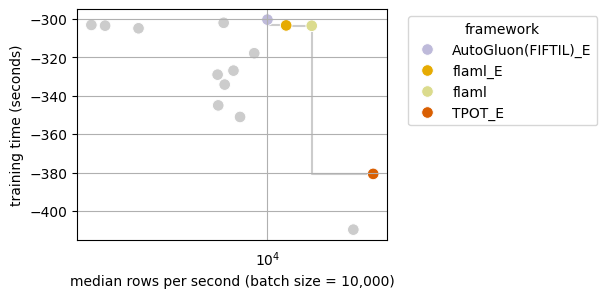

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3276426233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


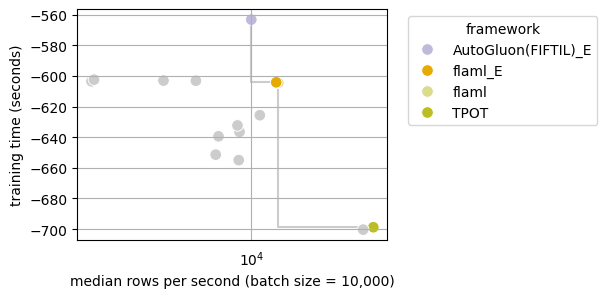

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3276426233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


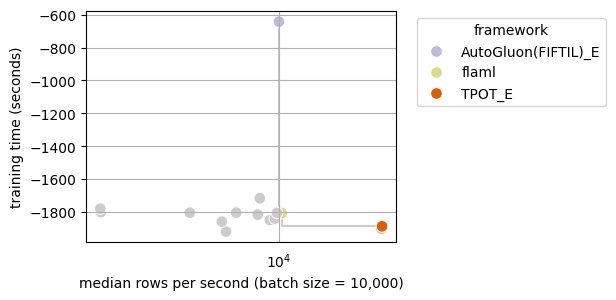

C:\Users\20210595\AppData\Local\Temp\ipykernel_19400\3276426233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))


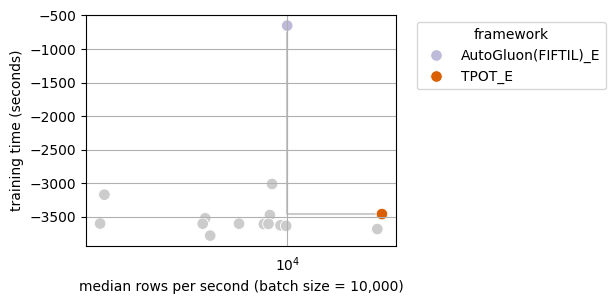

In [25]:
# pyplot.locator_params(nbins=4)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MaxNLocator

for name_time in strings_by_time:
    this_framework = results[results['framework'].str.contains(name_time) | results['framework'].isin(extra_frameworks)]
    this_framework['framework'] = this_framework['framework'].apply(lambda x: name_mapping.get(x, x))
        
    exclude = ["CP_60min", "RF_60min", "TRF_60min"]
    data = this_framework
    data = impute_missing_results(data, with_results_from="CP_60min")
    data = data[["framework", "task", "constraint", "metric", "result", "infer_batch_size_file_10000", "training_duration"]].groupby(["framework", "task", "constraint", "metric"], as_index=False).mean()

    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]

    data = add_rescale(data, lower="RF_60min")    
    data = data[~data["framework"].isin(exclude)]
    data['framework'] = data['framework'].str.replace(name_time, '')
    data["training_duration"] = -data["training_duration"]
    current_frameworks = data.framework.unique()
    common_elements = [element for element in list_order if element in current_frameworks]
    
    # data = data.groupby(["framework", "constraint", "metric"])[["infer_batch_size_file_10000", "training_duration"]].median()
    data = data.groupby(["framework", "constraint"])[["infer_batch_size_file_10000", "training_duration"]].median()

    data["row_per_s"] = 10_000. / data["infer_batch_size_file_10000"]
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}

    # Calculate Pareto efficient methods
    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    frameworks_to_keep_legend = []
    # # Update color map
    color_map = {k: v for k, v in FRAMEWORK_TO_COLOR.items() if k not in exclude}
    for framework in FRAMEWORK_TO_COLOR.keys():
        if framework in data.index.get_level_values('framework').unique():
            is_efficient = any(row_per_s_value in pareto_efficient_list for row_per_s_value in data.loc[framework, "row_per_s"])
            if is_efficient:
                frameworks_to_keep_legend.append(framework)
            else:
                color_map[framework] = "#cccccc"  # Grey color for inefficient methods

    # Create a dictionary to map frameworks to their corresponding row_per_s values
    framework_to_row_per_s = {framework: data.loc[framework, "row_per_s"].values[0] for framework in frameworks_to_keep_legend}
    
    # Sort frameworks_to_keep_legend based on the row_per_s values
    frameworks_to_keep_legend.sort(key=lambda framework: framework_to_row_per_s[framework])
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax = seaborn.scatterplot(
        data, 
        x="row_per_s", 
        y="training_duration", 
        hue="framework",
        palette=color_map,
        s=70,  # marker size
        # hue_order=common_elements,
        hue_order=frameworks_to_keep_legend,
        ax=ax,
    )
    # pareto_performance_inference(data, x="row_per_s", y="training_duration", ax=ax)
    plot_pareto(data, x="row_per_s", y="training_duration", ax=ax)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xscale('log')
    ax.set_xlabel('median rows per second (batch size = 10,000)')
    ax.set_ylabel('training time (seconds)')
    ax.grid(True)  # Add grid here

    pareto_efficient = calculate_pareto(data["row_per_s"], data["training_duration"])
    pareto_efficient_list = [x for x, y in pareto_efficient]
    pareto_efficient_list = sorted([x for x, y in pareto_efficient]) # only 1 x-stick
    # first_last_pareto = [pareto_efficient_list[0], pareto_efficient_list[-1]]
    first_last_pareto = [pareto_efficient_list[0]]
    selected_ticks = first_last_pareto
    selected_labels = first_last_pareto
    selected_labels = [f"$10^{{{int(np.log10(tick))}}}$" for tick in selected_ticks]
    
    # Set the selected x-ticks and labels
    ax.set_xticks(selected_ticks)
    ax.set_xticklabels(selected_labels)
    # ax.invert_yaxis()
    
    # Ensure the tick parameters are set correctly
    ax.tick_params(axis='x', which='major', bottom=False, top=False, labelbottom=True)
    seaborn.move_legend(ax, "upper right", bbox_to_anchor=(1.7, 1))
    # ax.set_title(f"{name_fr}-{ttype}")
    # Define the file path for the PNG file
    
    with PdfPages(FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_general{name_time}_gray.pdf") as f:
        f.savefig(fig, bbox_inches="tight")

    file_path = FIGURE_DIRECTORY / "pareto_training_inference" / f"training_inference_general{name_time}_gray.png"
    # Save the figure as a PNG file
    fig.savefig(file_path, bbox_inches="tight", dpi=1000)

    plt.show()
    plt.close(fig)